<div align="middle">
  <h1><b><i>تمرین سوم</i></b></h1>
 </div>




<div align="right" dir="auto">
    
   #  بخش اول:  هدوپ 

    ۱- به سوالات زیر پاسخ دهید
    - مفهوم replication جیست
    - مفهوم block در HDFS چیست و اگر بلاک‌ها را بسیار کوچک درنظر بگیریم چه مشکلی پیش می‌آید
    
</div>
  
    

<div align="right" dir="auto">
    الف) کلاستر HDFS برای اینکه از رخداد خطا‌های مختلف جلوگیری کند، از هر بلاک چندین کپی مختلف به نام رپلیکا می‌سازد و ذخیره ‌میکند تا در صورتی که یکی از نود‌ها و یا خود بلاک‌ در دسترس نبود یا از بین رفت، بتواند همچنان داده‌های ذخیره شده را به درستی بازیابی کند.
</div>
    

<div align="right" dir="auto">
ب) داده‌ها در HDFS به صورت توزیع شده در چندین بلاک مختلف ذخیره می‌شوند. اگر تعداد بلاک‌ها زیاد باشد، در مرحله بازیابی داده احتمال اینکه بلاک‌ها کنار یکدیگر قرار نگیرند را افزایش می‌دهد و این باعث می‌شود هزینه شبکه برای دسترسی به همه آنها پرداخت کنیم. به طور خلاصه سربار بیشتری خواهد داشت.
</div>

<div align="right" dir="auto">
   

    ۲- در  این قسمت شما باید ابتدا دیتاست داده شده را از حالت فشرده در بیاورید و سپس فایل‌های درون آن را در کلاستر هدوپ در مسیر /homework3/dataset/ بارگزاری کنید 
    نکته: در این بخش دستورات زده شده خود را برای کار با hdfs  در ترمینال را در سلول زیر وارد نمایید
    برای دسترسی به کامند 'hdfs dfs'  میتوانید وارد یکی از کانتینر‌های هدوپ شوید و دستور را اجرا کنید همچنین همه کانتینر‌ها دارای shared_dir
    در روت خود هستند و این دایرکتوری در تمام کانتینر‌ها به اشتراک گذاشته شده است
    برای چک کردن فایل‌ها در hdfs به 
    
[HDFS webUI](http://localhost:9870/explorer.html#/)
    
    مراجعه کنید
 </div>

`hdfs dfs -mkdir /hw3`

`hdfs dfs -put War.json Weapon.json`

<div align="right" dir="auto">
    
   #  بخش دوم:  اسپارک 

    ۱- به سوالات زیر پاسخ دهید
    - مزیت اسپارک نسبت به مدل قدیمی map/reduce چیست؟
    -  تفاوت action و transform در اسپارک چیست؟
    
</div>
  
    

<div align="right" dir="auto">
الف) در اسپارک داده‌ها مستقیما در مموری ذخیره می‌شود و پردازش‌های متوالی را میتواند روی RDD انجام دهد و این باعث افزایش سرعت پردازش داده خواهد شد. اما در مدل‌های قدیمی‌تر نتایج بر روی دیسک ذخیره می‌شد.
</div>
  
    

<div align="right" dir="auto">
ب) در transformation یک RDD به عنوان ورودی گرفته می‌شود و خروجی نهایی یک RDD دیگر است. در حالی که Action ورودی مشابه transformation دارد اما خروجی یک عدد خواهد بود.
</div>
  
    

<div align="right" dir="auto">
    

    ۲- کد‌های خواسته شده در قسمت‌های پایینی را تکمیل کنید
    (قسمت های ToDo )
</div>
  
    


<div align="right" dir="auto">
   
##  اتصال به کلاستر اسپارک و هدوپ 

    در این قسمت از تمرین باید به عنوان درایور یک سسشن  به کلاستر اسپارک بسازیم.
 </div>
  
    

In [1]:
import pyspark
from pyspark import SparkContext 
from pyspark.sql import SparkSession,Row
from pyspark.sql.functions import *
import math
import pandas , numpy
import matplotlib
import pprint
import os
import tempfile
from math import log
import matplotlib.pyplot as plt
from pyspark.sql.types import IntegerType

In [2]:
spark = SparkSession.builder.appName("homework3").master("spark://spark-master:7077").config("fs.defaultFS","hdfs://namenode:9000/").getOrCreate()
spark

23/01/27 10:24:40 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).



<div align="right" dir="auto">
   
#  خواندن داده 

    :در اسپارک ما ساختارهای مختلفی برای کار با داده و پخش شدن آن‌ها در شبکه داریم که به ۳ دسته تقسیم بندی میشوند 
+ RDD
+ Dataset
+ DataFrame
    
    
     برای مطالعه بیشتر به لینک زیر مراجعه کنید:
[rdd-vs-dataframe-vs-dataset](https://phoenixnap.com/kb/rdd-vs-dataframe-vs-dataset)

    ما در درس با ساختار RDD آشنا شدیم حال در این تمرین میخواهیم با ساختار Dataframe آشنا شویم و به کمک آن دیتا را از روی HDFS بخوانیم و روی آن فایل‌ها پردازش انجام دهیم
 
 </div>
  
    

- [Spark Cluster Master UI](http://localhost:8080/)
- [Application master UI (driver UI)](http://localhost:4040)
- [Web Hdfs](http://localhost:9870/explorer.html#/)


<div align="right" dir="auto">
 .در این قسمت دیتاست را لود می‌کنیم 
</div>

In [3]:
War = spark.read.json("/hw3/War.json")
Weapon = spark.read.json("/hw3/Weapon.json")

<div align="right" dir="auto">
برای اینکه بتوانیم روی دیتای لود شده به وسیله تابع  spark.sql
    کوئری‌های SQL بزنیم
    باید دو دیتاست لود شده را به عنوان table
    به spark 
    معرفی کنیم
</div>

In [4]:
War.registerTempTable("War")
Weapon.registerTempTable("Weapon")

<div align="right" dir="auto">
یک مثال ...
</div>

In [5]:
spark.sql("SELECT * FROM War where DurationOfWar=1005.0 limit 1;").show()

+-----------+-------------+--------+-------------+--------------+------------+
|  DateOfWar|DurationOfWar|Location|MinorityStart|TargetMinority|      Weapon|
+-----------+-------------+--------+-------------+--------------+------------+
|73298-04-22|       1005.0|BIEN HOA|          Elf|           Orc|Mirkwood Bow|
+-----------+-------------+--------+-------------+--------------+------------+



In [6]:
War.select("*").filter(col("DurationOfWar")==1005.0).limit(1).show()

+-----------+-------------+--------+-------------+--------------+------------+
|  DateOfWar|DurationOfWar|Location|MinorityStart|TargetMinority|      Weapon|
+-----------+-------------+--------+-------------+--------------+------------+
|73298-04-22|       1005.0|BIEN HOA|          Elf|           Orc|Mirkwood Bow|
+-----------+-------------+--------+-------------+--------------+------------+



<div align="right" dir="auto">
 ده رکورد آخر را نمایش دهید
</div>

In [7]:
spark.sql("select * from War order by DateOfWar desc limit 10;").toPandas()

,DateOfWar,DurationOfWar,Location,MinorityStart,TargetMinority,Weapon
0,73365-06-30,800.0,NAKHON PHANOM,Elf,Nazgul,None
1,73365-06-30,800.0,UDORN AB,Elf,Nazgul,Andúril
2,73365-06-30,800.0,KORAT,Elf,Nazgul,Glamdring
3,73365-06-30,800.0,UDORN AB,Elf,Nazgul,None
4,73365-06-30,800.0,NAKHON PHANOM,Elf,Nazgul,None
5,73365-06-30,800.0,NAKHON PHANOM,Elf,Nazgul,None
6,73365-06-30,1.0,UDORN AB,Elf,Goblin,Andúril
7,73365-06-30,1800.0,NAKHON PHANOM,Elf,Nazgul,None
8,73365-06-30,800.0,NAKHON PHANOM,Elf,Nazgul,None
9,73365-06-30,800.0,U TAPAO,Elf,Nazgul,None


<div align="right" dir="auto">
اسکیما یا ساختار دیتاست ها را نمایش دهید

</div>

In [8]:
War.printSchema()
Weapon.printSchema()

root
 |-- DateOfWar: string (nullable = true)
 |-- DurationOfWar: double (nullable = true)
 |-- Location: string (nullable = true)
 |-- MinorityStart: string (nullable = true)
 |-- TargetMinority: string (nullable = true)
 |-- Weapon: string (nullable = true)

root
 |-- Description: string (nullable = true)
 |-- Weapon: string (nullable = true)



### Expected
![image](expected_answers/1.png)


<div align="right" dir="auto">
   
#  اسپارک SQL 

    مهمترین قابلیت اسپارک این است که می‌تواند با خواندن فایل‌ها به صورت توزیع شده روی آن‌ها پردازش انجام دهد و این پردازش را برنامه ‌نویس میتواند با استفاده از دستورات SQL اعمال کند
    در این بخش از شما انتظار می‌رود که به وسیله spark SQL  به اسپارک کوئری  بزنید . 
    
    
 </div>

[pyspark.sql.functions.col](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.col.html)

[pyspark.sql.DataFrame.count](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.count.html)

[pyspark.sql.DataFrame.filter](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.filter.html)

[pyspark.sql.DataFrame.groupBy](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.groupBy.html)

<div align="right" dir="auto">
 چه تعداد نبرد در کل این دوران‌ها انجام شده است؟
</div>

In [11]:
spark.sql('select count(*) from war').toPandas()

,count(1)
0,4400775


### Expected
![image](expected_answers/2.png)

<div align="right" dir="auto">
هر نژاد در چه تعدادی نبرد مشارکت داشته اند  به صورت مرتب شده نمایش دهبد؟
</div>

In [12]:
wars_df = spark.sql("select MinorityStart, count(*) as war_count from War group by MinorityStart order by war_count DESC;").toPandas()
wars_df

,MinorityStart,war_count
0,Elf,3708997
1,Orc,622013
2,Goblin,32777
3,Dwarf,24469
4,Hobbit,12519


### Expected
![image](expected_answers/3.png)


<div align="right" dir="auto">
   
#  اسپارک toPandas 

    یکی ار قابلیت‌های اسپارک این است که می‌توان dataframe های آن را به 
    dataframe های pandas تبدیل کند و از توابع آن از جمله
    توابع plot  آن برای رسم نمودار استفاده کرد.
    در این قسمت از شما انتظار می‌رود نمودار تعداد جنگ‌ها بر اساس هر گونه را رسم کنید.
    
 </div>
  
    

  
[pyspark.sql.DataFrame.toPandas](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.toPandas.html)

[pyspark.pandas.DataFrame.plot](https://spark.apache.org/docs/3.2.1/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.plot.html)


<AxesSubplot: xlabel='MinorityStart'>

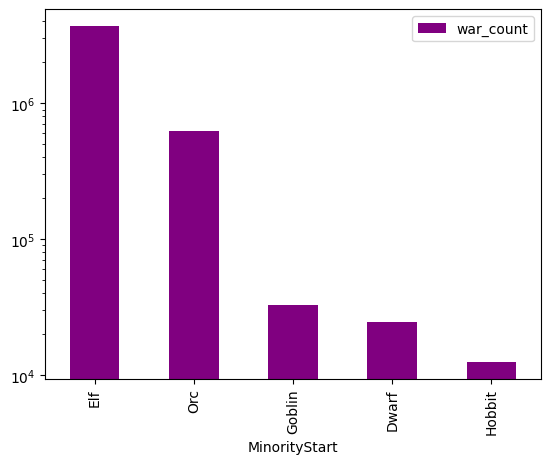

In [18]:
df = wars_df
df.plot(x="MinorityStart", y="war_count", kind="bar", logy=True, color='purple')

### Expected
![image](expected_answers/plotlib.png)

<div align="right" dir="auto">
چه تعداد نبردهایی بر اساس زمان انجام شده بر اساس زمان مرتب کنید
</div>

In [19]:
spark.sql("select DateOfWar, count(*) as war_count from War group by DateOfWar order by DateOfWar;").show()

+-----------+---------+
|  DateOfWar|war_count|
+-----------+---------+
|73295-10-01|      447|
|73295-10-02|      652|
|73295-10-03|      608|
|73295-10-04|      532|
|73295-10-05|      769|
|73295-10-06|      738|
|73295-10-07|      655|
|73295-10-08|      764|
|73295-10-09|      746|
|73295-10-10|      848|
|73295-10-11|      503|
|73295-10-12|      511|
|73295-10-13|      395|
|73295-10-14|      469|
|73295-10-15|      492|
|73295-10-16|      533|
|73295-10-17|      381|
|73295-10-18|      529|
|73295-10-19|      649|
|73295-10-20|      624|
+-----------+---------+
only showing top 20 rows



### Expected
![image](expected_answers/date_groupBy.png)

<div align="right" dir="auto">
نژاد "اورک" توسط چه نژادی مورد حمله قرار گرفته است ؟
</div>

In [20]:
spark.sql("select MinorityStart from War where TargetMinority='Orc' group by MinorityStart;").show()

+-------------+
|MinorityStart|
+-------------+
|          Elf|
|          Orc|
|       Hobbit|
|        Dwarf|
+-------------+



### Expected
![image](expected_answers/orc_target.png)


<div align="right" dir="auto">
   
#  اسپارک Shuffle 

    Spark SQL shuffle مکانیزمی است برای توزیع مجدد یا پارتیشن بندی مجدد داده ها به طوری که داده ها به طور متفاوت در پارتیشن ها گروه بندی می شوند، بر اساس اندازه داده شما ممکن است نیاز باشد تعداد پارتیشن های RDD/DataFrame را با استفاده از اسپارک کاهش یا افزایش دهید.
    برای مثال وقتی روی دو dataframe مختلف که روی شبکه توزیع شده اند
    دستور join را میزنیم یک عملیات 
    shuffling انجام میشود
    در این قسمت از شما انتظار می‌رود کوئری جوین زیر را نوشته و اجرا کنید همچنین به  صفحه 
    application master ui
    مراجعه کنید و نحوه shuffleing را گزارش کنید . 
     و همچنین توضیح دهید DAG scheduler  در اسپارک چیست ؟
 </div>
  
    

  
[shuffling in standalone cluster](https://medium.com/@rachit1arora/apache-spark-shuffle-service-there-are-more-than-one-options-c1a8e098230e)



<div align="right" dir="auto">
   یک لایه زمانبند در اسپارک است که برنامه‌ریزی انجام یک جاب را به صورت گام‌های متوالی(stage-oriented) انجام میدهد.
    در این زمان‌بند برای اجرای جاب‌ها یک گراف جهتدار بدون دور ساخته می‌شود که در آن گام‌های مختلف انجام تسک با توجه به نیازمندی‌های مختلف در سطح RDD و عملیات‌های مورد نظر کاربر،قرار داده می‌شود.
 </div>

<div align="right" dir="auto">
    
    بیشترین سلاحی که در این جنگ ها استفاده شده کدام سلاح  بوده است؟.
    جزییات این سلاح را از فایل مشخصات سلاح (Weapon) می‌توانید بدست آورید.
    فایل مربوط به سلاح ها را بازخوانی کرده و برای نمایش بین دو فایل از join استفاده شود.

</div>

In [6]:
spark.sql("select war.Weapon, count(war.Weapon) as weapon_count, weapon.Description from War join Weapon on war.Weapon = weapon.Weapon group by war.Weapon, weapon.Description order by weapon_count DESC;").show()

+------------+------------+--------------------+
|      Weapon|weapon_count|         Description|
+------------+------------+--------------------+
|     Andúril|      909362|"Reforged from th...|
|       Narya|      451385|Narya has the pow...|
|       Vilya|      372975| Vilya was the st...|
|     Orcrist|      358498|"A sword in The H...|
|Mirkwood Bow|      267457| Legolas wielded ...|
|       Nenya|      242231|Galadriel’s ring ...|
|   Glamdring|      165773|"A sword in The H...|
|    Aranrúth|      146543|A sword wielded b...|
| Master Ring|      144601|The Ring was a si...|
|       Sting|      140410|A knife in The Ho...|
|       Grond|       99100|"The name of the ...|
|Dragon-helm |       82219|A helmet owned an...|
|      Aeglos|       76525|A spear wielded b...|
|    Herugrim|       75058|A sword that belo...|
|   Red Arrow|       73843|"A black-feathere...|
|   Anglachel|       71716|A sword forged by...|
|    Gúthwinë|       58691|A sword wielded b...|
|Belthronding|      

### Expected
![image](expected_answers/most_used_weapons.png)

     # ToDo
     # Refere to Application master UI


<div align="right" dir="auto">
   
# تابع تعریف شده توسط کاربر(UDF)

    یکی از مزایای اسپارک این است که نه تنها برای ما یک زبان SQL فراهم کرده که روی چندین سرور به صورت همزمان پردازش را انجام دهد بلکه 
    میتوان به زبان‌های مختلف توابعی تعریف کرد که روی  همه executor ها اجرا شود
    در این بخش از شما انتظار می‌رود که با نوشتن یک UDF به زبان پایتونی 
    توضیحات هر اسلحه را به 3 کلمه اول آن کوتاه کنید و بقیه کلمات را حذف کنید و سوتونی به نام short_description را به داده های 
    Weapon اضافه کنید
    
    
 </div>
 
[pyspark.sql.functions.udf](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.functions.udf.html)

[pyspark.sql.DataFrame.withColumn](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.DataFrame.withColumn.html)

    



In [9]:
@udf
def short_desc(s):
    return  ' '.join(s.strip().split()[:3])
Weapon.select("Description", "Weapon", short_desc("Description")).show()


+--------------------+------------+-----------------------+
|         Description|      Weapon|short_desc(Description)|
+--------------------+------------+-----------------------+
|Narya has the pow...|       Narya|          Narya has the|
| Vilya was the st...|       Vilya|          Vilya was the|
|"Reforged from th...|     Andúril|     "Reforged from the|
|"A sword in The H...|     Orcrist|            "A sword in|
| Legolas wielded ...|Mirkwood Bow|    Legolas wielded two|
|Galadriel’s ring ...|       Nenya|   Galadriel’s ring had|
|"A sword in The H...|   Glamdring|            "A sword in|
|A sword wielded b...|    Aranrúth|        A sword wielded|
|The Ring was a si...| Master Ring|           The Ring was|
|A knife in The Ho...|       Sting|             A knife in|
|"The name of the ...|       Grond|           "The name of|
|A helmet owned an...|Dragon-helm |         A helmet owned|
|A spear wielded b...|      Aeglos|        A spear wielded|
|A sword that belo...|    Herugrim|     

### Expected
![image](expected_answers/shortener_udf.png)


<div align="right" dir="auto">
   
# نوشتن داده و پارتیشنینگ
    زمانی که میخواهیم داده های حجیم را به صورت فایل هایی ذخیره کنیم  نمیتوانیم همه داده را در یک فایل بزرگ ذخیره کنیم به چند دلیل :
-  ذخیره سازی یک فایل بزرگ باعث ؛تنها نقطه شکست میشود؛ و با حذف آن کل داده از دست میرود
- جستجو در این یک فایل بزرگ که مرتب شده نیست دشوار و عملی نیست
- آپدیت کردن سخت تر میشود
پس تا حدودی حل این میشکل از راه حل های زیر استفاده میکنیم
# پارتیشنینگ: 
-     بر اساس یک فیلد داده هارا دسته بندی میکنیم و در دایرکتوری های مختلف میریزیم این کار را اسپارک برای ما انجام میدهد

    
 </div>
  
    



<div align="right" dir="rtl">

    در این بخش شما باید یک دیتاست کامل بسازید بدین شکل که دیتاست War و Weapon
     را با یکدیگر جوین کنید سپس همه آن رکورد‌هایی که  در توضیحات اسلحه آنها کلمه sword 
    نیامده است را فیلتر کرده و برا اساس گونه شروع کننده جنگ (MinorityStart) پارتیشن کنید
    و روی HDFS
      در مسیر /homework3/<student_number>/output/war_without_sword بنویسید
    و ۲۰ رکورد اول آن را نمایش دهید
    توجه کنید فایل‌های خروجی باید از نوع JSON باشند
    
    
</div>

[pyspark.sql.DataFrameWriter.partitionBy](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrameWriter.partitionBy.html)


In [10]:
spark.sql("select war.DateOfWar, war.DurationOfWar, war.Location, war.MinorityStart, war.TargetMinority, war.Weapon, weapon.Description  from war join weapon on war.Weapon = weapon.Weapon where Description not like '%sword%';").show()

+-----------+-------------+-------------+-------------+--------------+------------+--------------------+
|  DateOfWar|DurationOfWar|     Location|MinorityStart|TargetMinority|      Weapon|         Description|
+-----------+-------------+-------------+-------------+--------------+------------+--------------------+
|73361-06-05|       1005.0| TAN SON NHUT|          Elf|           Orc|Belthronding|A bow wielded by ...|
|73362-12-26|        530.0|NAKHON PHANOM|          Elf|           Orc|Belthronding|A bow wielded by ...|
|73363-07-28|        730.0|     UDORN AB|          Elf|        Goblin|       Nenya|Galadriel’s ring ...|
|73360-10-08|       1240.0|       DANANG|          Orc|           Orc|Mirkwood Bow| Legolas wielded ...|
|73362-03-08|       1005.0|  TONKIN GULF|          Elf|        Goblin|       Vilya| Vilya was the st...|
|73362-09-12|        710.0| TAN SON NHUT|          Elf|           Orc|Belthronding|A bow wielded by ...|
|73361-05-12|       1304.0|  TONKIN GULF|          Elf|

### Expected
![war without sword](expected_answers/war_without_sword.png)




In [ ]:
spark.sql("select war.DateOfWar, war.DurationOfWar, war.Location, war.MinorityStart, war.TargetMinority, war.Weapon, weapon.Description  from war join weapon on war.Weapon = weapon.Weapon where Description not like '%sword%';").write.partitionBy('MinorityStart').json(os.path.join(tempfile.mkdtemp(), '/homework3/9823010/output/war_without_sword'))

<div align="right" dir="rtl">
    
  ### گزارش HDFS
    با مراجعه به HDFS UI
    خروجی پارتیشن شده مسیر بالا را مشاهده میکنید
     -تعداد دایرکتوری‌های ایجاد شده چندتاست و دلیل آن چیست؟ 
    -در هر دایرکتوری ایجاد شده چند فایل JSON میبینید و دلیل تعدد این فایل‌ها چیست؟
    - چگونه میتوان از اسپارک خواست تا از تعدد این فایل‌ها جلوگیری کند و یک فایل در این مسیر‌ها بریزد؟
    - coalesce و repartition  در اسپارک چیستند و کاربر اصلی آنها چیست؟
</div>



<div align="right" dir="rtl">

    - به تعداد گونه های شروع کننده جنگ دایرکتوری داریم
    - PySpark creates partitions that are equal to the number of CPU cores in the machine (به تعداد تعداد هسته های cpu!) تا به صورت موازی پردازش هارا انجام دهد.
    - به کمک coalesce, repartition
    - coalesce از پارتیشن‌های موجود برای به حداقل رساندن مقدار داده‌های شافل شده استفاده می‌کند. در صورتی که repartition پارتیشن‌های جدیدی ایجاد می‌کند و یک شافل کامل انجام می‌دهد. در نتیجه coalesce منجر به پارتیشن هایی با اندازه های مختلف می شود (گاهی پارتیشن هایی که اندازه های بسیار متفاوتی دارند) و پارتیشن مجدد منجر به پارتیشن هایی با اندازه تقریباً مساوی می شود.
    اگر مجموعه داده‌ای را بارگذاری کرده ایم که شامل داده‌های عظیم و transformations زیادی است که به توزیع مساوی از executor نیاز دارند، باید از Repartition استفاده کنید.
    هنگامی که همه تبدیل‌ها اعمال شدند، از Coalesce برای ذخیره همه داده‌ها در فایل‌های کمتر (تعداد فایل = تعداد پارتیشن‌ها) به جای تعداد زیادی فایل استفاده میکنیم
    
</div>

    # ToDo

<div align="right" dir="rtl">

   ## coalesce
    همان تسک بالا را انجام دهید  ولی  سعی کنید در هر دایرکتوری پارتیشن شده تنها یک فایل JSON ریخته شود.
    نکته:  در مسیر جدید زیر آن را بنویسید.
    /homework3/<student_number>/output/war_without_sword_v2/
    
    
</div>

[pyspark.sql.DataFrame.coalesce](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.coalesce.html)


In [ ]:
spark.sql("select war.DateOfWar, war.DurationOfWar, war.Location, war.MinorityStart, war.TargetMinority, war.Weapon, weapon.Description  from war join weapon on war.Weapon = weapon.Weapon where Description not like '%sword%';").repartition(1, 'MinorityStart').write.partitionBy('MinorityStart').json(os.path.join(tempfile.mkdtemp(), '/homework3/9823010/output/war_without_sword_single_file'))

In [ ]:
spark.sql("select war.DateOfWar, war.DurationOfWar, war.Location, war.MinorityStart, war.TargetMinority, war.Weapon, weapon.Description  from war join weapon on war.Weapon = weapon.Weapon where Description not like '%sword%';").coalesce(1).write.partitionBy('MinorityStart').json(os.path.join(tempfile.mkdtemp(), '/homework3/9823010/output/war_without_sword_single_file'))